# TMDb movie data act report¶
### intro
In Data wrangling, 3 steps were performed to gather, assess and clean the datasets that contain data of the movies on IMDB . The data is then explorex and analyzed. For data wrangling process, please refer to wrangle_act file for steps and codes.

## data wrangling and cleaning summary 
data was provided as csv file, read it using pandas ,the cleaning process started with cleaning the data and getting rid of a bunch of columns 'cast','homepage','tagline','keywords','overview','budget_adj','revenue_adj','imdb_id',and changed the type of id to string and release_year to date and time . hadd a problem with the genres as there are more than one genre in the same movie so had to split them by greating dummies and then add these olumns to the data , removeed the duplicates and filled the missing values of the genres with not specified , created a profit column out of the revenue and the budget 

## insights

- first insight is the correlation between the budget and the revenue and it was calcuated r=0.73 on Pearson so it was a postive correlation and below you can see the graph representing this positive correlation so the increase in the budget increases the tweets increases too 

In [1]:
import pandas as pd 
import numpy as np 
import requests 
from PIL import Image 
from io import BytesIO
import tweepy 
import json 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
%config Inlinebackend.figure_format='retina'
sns.set_style("dark")

In [2]:
df_c=pd.read_csv('imdb_cleaned.csv')


In [3]:
df_c['profit']=df_c['revenue']-df_c['budget']

## what is the relationship between the budget and the revenue ? 

No handles with labels found to put in legend.


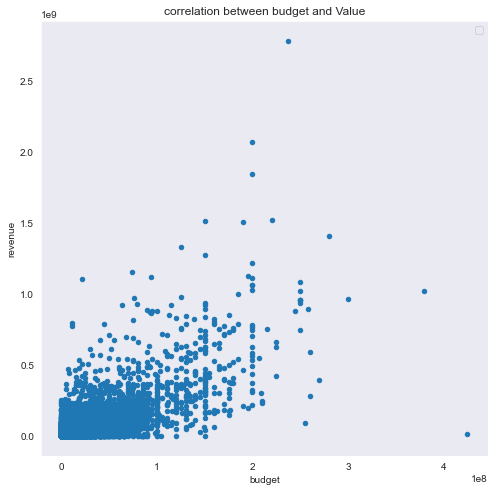

In [4]:
df_c.plot(x='budget',y='revenue',figsize=(8,8),kind='scatter');
plt.title('correlation between budget and Value')
plt.legend();

- and the value of this correlation is as follows 

In [5]:
df_c['budget'].corr(df_c['revenue'])

0.7349279812889288

In [6]:
df_c.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,...,Music,Mystery,Not specified,Romance,Science Fiction,TV Movie,Thriller,War,Western,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,...,0,0,0,0,1,0,1,0,0,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,...,0,0,0,0,1,0,1,0,0,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,...,0,0,0,0,1,0,1,0,0,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,...,0,0,0,0,1,0,0,0,0,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,...,0,0,0,0,0,0,1,0,0,1316249360


## so the correlation bettween the budget and the revenue is positve and equals 0.73 , so by increasing the buget the movie tends to genrate more money 

### i used the correlation graph in this insight to check if there is dependcy between the budget and the revenues as the correlation analysis would be the most suitble analysis for that 

## Which Geners are the most popular and which are the least popular ? 


In [8]:
df_c.corr(method ='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,Action,Adventure,...,Music,Mystery,Not specified,Romance,Science Fiction,TV Movie,Thriller,War,Western,profit
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.076854,-0.073957,...,0.023137,-0.031871,0.046119,-0.073876,-0.021216,0.070016,-0.025838,-0.020253,-0.030876,-0.074975
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.148334,0.200912,...,-0.031426,0.012363,-0.022034,-0.023507,0.126795,-0.046913,0.057478,0.012966,-0.006932,0.628997
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.224739,0.293390,...,-0.033135,0.013726,-0.021789,-0.029282,0.119553,-0.058026,0.050510,0.032366,0.017474,0.570222
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.149391,0.247944,...,-0.019001,0.000948,-0.015678,-0.015284,0.092527,-0.042261,0.009823,0.010613,-0.011949,0.976162
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.048083,0.051720,...,0.019295,0.034881,-0.046115,0.066421,-0.030180,-0.040171,0.022647,0.129994,0.061351,0.136022
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.161735,0.203299,...,-0.031934,0.009664,-0.015993,-0.038565,0.136306,-0.039729,0.039989,0.014791,-0.002515,0.755908
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,-0.106174,-0.014569,...,0.106755,-0.008566,0.022004,0.031387,-0.118177,-0.024984,-0.145002,0.055102,0.014345,0.183067
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,-0.052373,-0.059700,...,-0.017356,-0.032591,0.011972,-0.029812,-0.037434,0.032305,0.017531,-0.065107,-0.139629,0.032038
Action,-0.076854,0.148334,0.224739,0.149391,0.048083,0.161735,-0.106174,-0.052373,1.000000,0.345958,...,-0.084839,-0.053113,-0.024420,-0.158491,0.187005,-0.035510,0.225640,0.066798,0.077825,0.109040
Adventure,-0.073957,0.200912,0.293390,0.247944,0.051720,0.203299,-0.014569,-0.059700,0.345958,1.000000,...,-0.061184,-0.058034,-0.018226,-0.097304,0.155942,0.013973,-0.036810,0.014594,0.047647,0.206453


### we can notice that Adventure movies tend to be the most popular then action then Scify, on the contrary movies that tend to be less popular are the documentry movies 

### there is a huge range of genres and of course i'd be too long to check the correlation between if one them and the popularity , so i performed a correlation analysis on the whole data using pearson method ,so i can spot the effective correlation with numbers 

## so what is the most popular movie in the Aventure and the least popular In documentries?

In [9]:
df_c.query('Adventure == " 1"').popularity.max()

32.985763

In [10]:
df_c.query('popularity == " 32.985763"')

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,...,Music,Mystery,Not specified,Romance,Science Fiction,TV Movie,Thriller,War,Western,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,...,0,0,0,0,1,0,1,0,0,1363528810


In [11]:
df_c.query('Documentary == " 1"').popularity.min()

0.001117

In [12]:
df_c.query('popularity == "0.001117"')

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,...,Music,Mystery,Not specified,Romance,Science Fiction,TV Movie,Thriller,War,Western,profit
7267,1392,0.001117,350000,3515061,Born into Brothels,Zana Briski|Ross Kauffman,85,Documentary,2004-12-08,23,...,0,0,0,0,0,0,0,0,0,3165061


<img src="files/1.jpg">
<img src="files/2.jpg">

-  Most Popular action and adventure movie is 'Jurassic World' and least popular documentry movie is 'Born into Brothels'

#### here i performed quiery on the adventure gernre to get the most popular movie in it and another query on the doumentry to get least popular move in it, to know most popular movie in the most popular genre and the least popular movie in the least popular genre .  

### how does the profit develop along the time ?

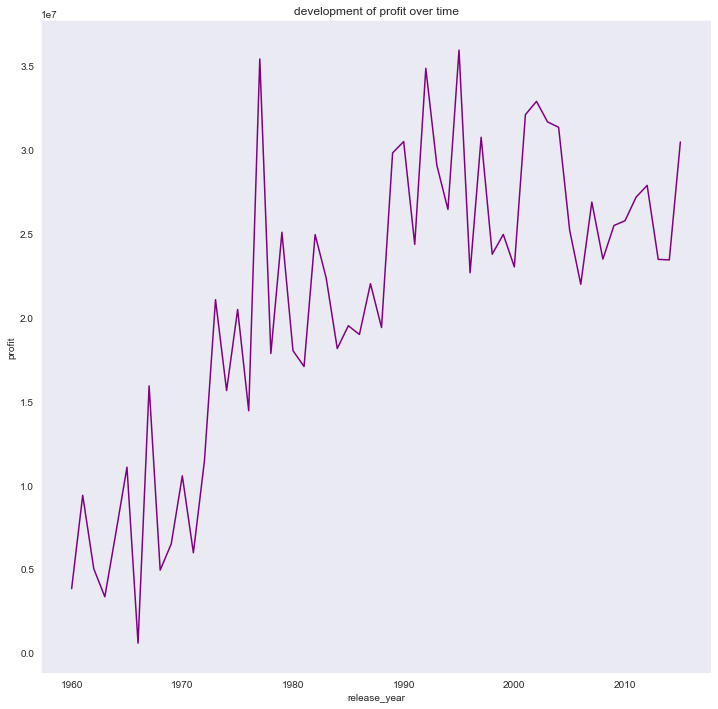

In [13]:

df_c.profit.groupby([df_c['release_year']]).mean().plot(kind='line',figsize=(12,12),color='purple')
plt.ylabel('profit')
plt.title('development of profit over time');

### as we can see the profit increases year by year 

#### i opted here for a linear graph to chek the progress of the profit over time and what grasped my attention is that the peak of the profit and 80s was quite simmilar to 90s and then the profits started to drop slowly , but overall the the profits were going up

## who directed the highest number of movies in teh data set and what is his most popular movie in the data?

In [14]:
df_c.director.value_counts()

Woody Allen                45
Not specified              44
Clint Eastwood             34
Steven Spielberg           29
Martin Scorsese            29
                           ..
Alan Rafkin                 1
Roger Nygard                1
Sam Garbarski               1
Ted Berman|Richard Rich     1
J.G. Quintel                1
Name: director, Length: 5068, dtype: int64

<img src="files/golden.jpg">
- the dirctor that directed most of the movies in the data set is 'Woody Allen'

In [15]:
df_c.query('director=="Woody Allen"')

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,...,Music,Mystery,Not specified,Romance,Science Fiction,TV Movie,Thriller,War,Western,profit
155,282984,1.007054,11000000,27391084,Irrational Man,Woody Allen,95,Mystery|Drama,2015-07-17,319,...,0,1,0,0,0,0,0,0,0,16391084
790,229297,0.889247,0,32339326,Magic in the Moonlight,Woody Allen,97,Comedy|Drama|Romance,2014-07-25,464,...,0,0,0,1,0,0,0,0,0,32339326
1332,703,1.179653,4000000,38251425,Annie Hall,Woody Allen,93,Comedy|Drama|Romance,1977-04-19,493,...,0,0,0,1,0,0,0,0,0,34251425
1489,19265,0.804857,15000000,0,Whatever Works,Woody Allen,92,Comedy|Romance,2009-06-19,174,...,0,0,0,1,0,0,0,0,0,-15000000
2125,38031,0.493121,22000000,0,You Will Meet a Tall Dark Stranger,Woody Allen,98,Comedy|Drama|Romance,2010-05-23,131,...,0,0,0,1,0,0,0,0,0,-22000000
2550,9684,0.281948,0,0,Sweet and Lowdown,Woody Allen,95,Comedy|Drama,1999-12-03,48,...,0,0,0,0,0,0,0,0,0,0
2743,2779,0.446532,0,0,The Curse of the Jade Scorpion,Woody Allen,103,Comedy|Crime|Mystery|Romance|Thriller,2001-08-05,77,...,0,1,0,1,0,0,1,0,0,0
2963,5038,0.866771,15000000,96408652,Vicky Cristina Barcelona,Woody Allen,96,Drama|Romance,2008-08-15,563,...,0,0,0,1,0,0,0,0,0,81408652
3428,59436,1.367727,30000000,151119219,Midnight in Paris,Woody Allen,94,Fantasy|Comedy|Romance,2011-05-11,1117,...,0,0,0,1,0,0,0,0,0,121119219
4045,9689,0.444428,16000000,0,Hollywood Ending,Woody Allen,112,Comedy|Drama,2002-05-03,54,...,0,0,0,0,0,0,0,0,0,-16000000


## out of the 45 movies that Woody allen directed his most popular one was ' Midnight in Paris'	

### i had the directors column , so i used Value_counts to get the names of the directors and how many times therir name was repeated, notice that the second result was 'Not specified 'as this what i used to replace Nan values , then i performed a query to see the movies that Woody allen made and spoted the most popular one 

how the run time is represented on a histo diagramm ?

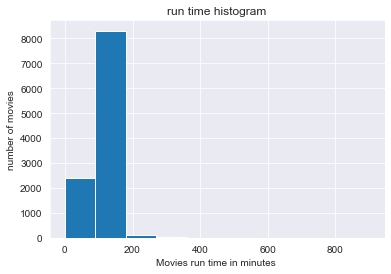

In [16]:
df_c.runtime.hist();
plt.title('run time histogram')
plt.xlabel('Movies run time in minutes ')
plt.ylabel('number of movies');

### the run time is skewed to the left 

 i uesd the histogram plot for run time to check the skewenes of the running timre of movies ,and to now in which range is the run time located for most of the movies 

# that was all <a id='conclusions'></a>
## conclusion 
 
there is a poistive correlation between the budget and the revenue and most of the popular movies are in the aventure and action categories and they have high budget and most of the unpopular movies are Documentries, the profit of the movies indcrese year by year
- limitations :
some of the limitations that i met is the fact that there are a lot of movies which have budget and revenue with 0 and the only way to correct them is to scrap imdb for the real values , and tgis for example avoided me from calculting  the movie with min budget and revenue as I'm going to get always 0 
_ another limitation was that the same movie was in different kiind of genres and that did't help with my analysis ,a solution from imdb would to specify what is the most dominant genre for a movie or even to write percentages 



In [17]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')